# Project 1: Retail Product Inventory Optimization using PuLP
Goal:
Optimize which products a retailer should restock given budget, space, and demand constraints.

Possible Features to Use:
Product_Category

Product_Brand

Product_Type

Total_Purchases

Total_Amount

# Project Title: Retail Product Inventory Optimization using PuLP


## Step 1: Problem Statement
Retailers often face constraints such as limited budget and shelf space. The goal of this project is to:

Select an optimal set of products to restock from the catalog

Maximize expected profit

Respect constraints like shelf space and budget

## Step 2: Import Libraries and Load Data

In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\Gouthum\Downloads\Retail Projects\Dataset\retail_data.csv')

# Quick check
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Step 3: Feature Engineering
We will:

Calculate profit per product

Filter for top-selling products

Prepare data for optimization


In [3]:
df.shape

(302010, 30)

In [5]:
df.dtypes

Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [7]:
print(df['products'].head(5))

0       Cycling shorts
1           Lenovo Tab
2     Sports equipment
3        Utility knife
4    Chocolate cookies
Name: products, dtype: object


In [9]:
# Select relevant columns (based on what's available)
df_small = df[['products', 'Product_Category', 'Total_Purchases']].dropna()

# Group by product to calculate total purchases (demand)
df_grouped = df_small.groupby('products').agg({
    'Total_Purchases': 'sum'
}).reset_index()

# Sort by total purchases (as a proxy for demand)
df_grouped = df_grouped.sort_values(by='Total_Purchases', ascending=False).head(100)

In [11]:
df_grouped 

,products,Total_Purchases
98,Distilled water,13458.0
39,Bottled water,13399.0
270,Spring water,13319.0
15,Artesian water,13191.0
190,Mystery,13156.0
...,...,...
93,Desk,6354.0
0,4K TV,6349.0
219,Pomegranate juice,6346.0
163,Lemon-lime soda,6343.0


## Calculate Profit per unit, total_purchases, unit_price, Demand_score

In [18]:
import numpy as np

# Simulate prices
np.random.seed(42)
df_small['Unit_Price'] = np.random.uniform(100, 1000, size=len(df_small))
df_small['MRP'] = df_small['Unit_Price'] + np.random.uniform(50, 300, size=len(df_small))

# Profit per unit
df_small['Profit_Per_Unit'] = df_small['MRP'] - df_small['Unit_Price']

# Re-group and compute demand score
df_grouped = df_small.groupby('products').agg({
    'Profit_Per_Unit': 'mean',
    'Total_Purchases': 'sum',
    'Unit_Price': 'mean'
}).reset_index()

df_grouped['Demand_Score'] = df_grouped['Profit_Per_Unit'] * df_grouped['Total_Purchases']
df_grouped = df_grouped.sort_values(by='Demand_Score', ascending=False).head(100)


In [20]:
df_grouped

,products,Profit_Per_Unit,Total_Purchases,Unit_Price,Demand_Score
15,Artesian water,177.783333,13191.0,549.733132,2.345140e+06
39,Bottled water,174.770318,13399.0,547.825272,2.341747e+06
98,Distilled water,173.209792,13458.0,548.987303,2.331057e+06
270,Spring water,174.555361,13319.0,554.819367,2.324903e+06
190,Mystery,174.978271,13156.0,564.816174,2.302014e+06
...,...,...,...,...,...
228,QLED TV,173.334182,6442.0,544.046785,1.116619e+06
0,4K TV,175.756728,6349.0,546.391456,1.115879e+06
239,Samsung Galaxy Tab,174.710609,6368.0,541.360167,1.112557e+06
79,Cream soda,175.965272,6318.0,551.058596,1.111749e+06


##  successfully created a top 100 high-demand products list using a simulated Profit_Per_Unit, total purchases, and demand score

### Column	Description



products	        -                 Product name (e.g., 4K TV, Bottled water)


Profit_Per_Unit	    -                 Simulated average profit per unit


Total_Purchases	    -                 Total units sold (demand)


Unit_Price	        -                 Simulated average price


Demand_Score	    -                Profit × Demand — a score showing both popularity and profitability

### Top Product: Artesian water  
→ Profit per unit: ₹177.78  

→ Units sold: 13,191  

→ Demand score: ₹2.34 million  

####  Artesian water is highly profitable and in high demand — an ideal product to focus on for marketing, promotions, or stock planning.

## Top 10 Products by Demand Score

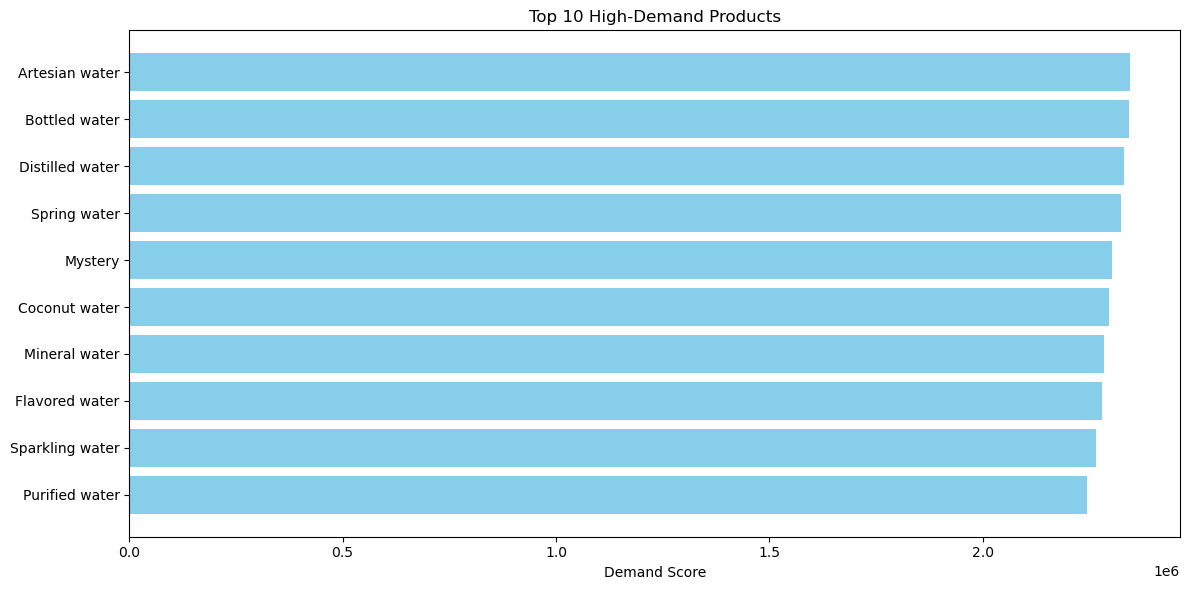

In [25]:
import matplotlib.pyplot as plt

top_10 = df_grouped.head(10)
plt.figure(figsize=(12,6))
plt.barh(top_10['products'][::-1], top_10['Demand_Score'][::-1], color='skyblue')
plt.xlabel('Demand Score')
plt.title('Top 10 High-Demand Products')
plt.tight_layout()
plt.show()

In [40]:
df_grouped.to_csv('top_100_products_by_demand.csv', index=False)


## 1. Scatter Plot: Profit vs Total Purchases
This will help you visually identify which products are:

High profit & high volume (ideal!)

High profit but low volume (niche premium)

Low profit but high volume (mass-market)

Low profit & low volume (poor performers)

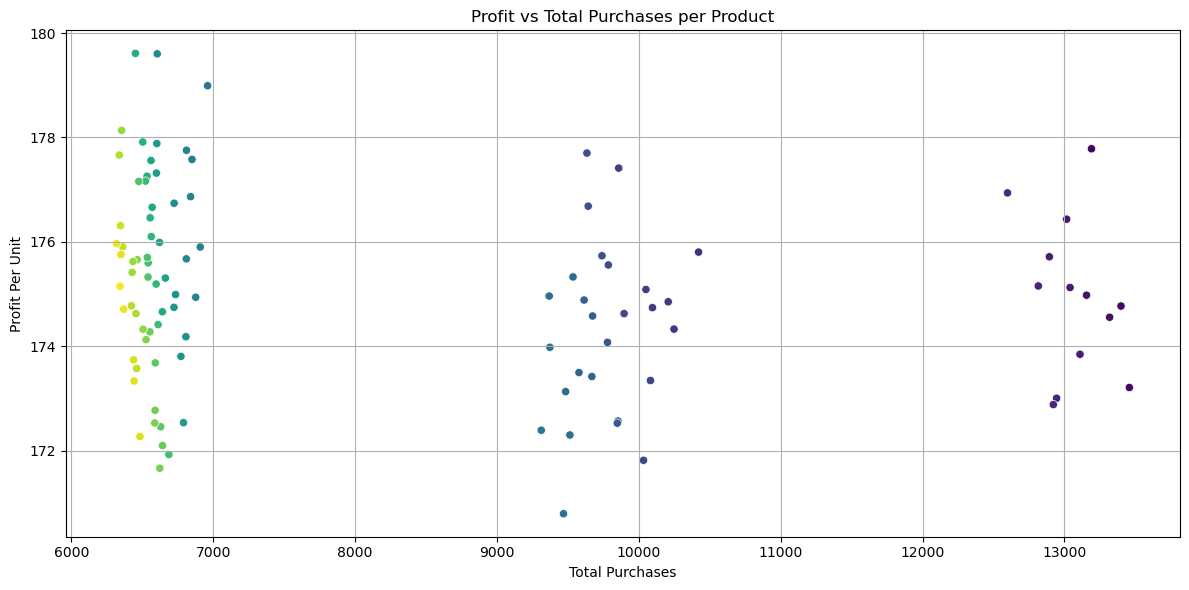

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_grouped,
    x='Total_Purchases',
    y='Profit_Per_Unit',
    hue='products',
    palette='viridis',
    legend=False
)
plt.title('Profit vs Total Purchases per Product')
plt.xlabel('Total Purchases')
plt.ylabel('Profit Per Unit')
plt.grid(True)
plt.tight_layout()
plt.show()


##  2. Recommendation: Top 5 Products by Category

In [50]:
# Merge with original product category
top_products = df_grouped.merge(df[['products', 'Product_Category']], on='products', how='left')

# Group by Product_Category and get top 5 by Demand Score
top_by_category = (
    top_products.sort_values(by='Demand_Score', ascending=False)
    .groupby('Product_Category')
    .head(5)
)


In [52]:
top_by_category 

,products,Profit_Per_Unit,Total_Purchases,Unit_Price,Demand_Score,Product_Category
0,Artesian water,177.783333,13191.0,549.733132,2.345140e+06,Grocery
1655,Artesian water,177.783333,13191.0,549.733132,2.345140e+06,Grocery
1648,Artesian water,177.783333,13191.0,549.733132,2.345140e+06,Grocery
1649,Artesian water,177.783333,13191.0,549.733132,2.345140e+06,Grocery
1650,Artesian water,177.783333,13191.0,549.733132,2.345140e+06,Grocery
11598,Mystery,174.978271,13156.0,564.816174,2.302014e+06,Books
11624,Mystery,174.978271,13156.0,564.816174,2.302014e+06,Books
11618,Mystery,174.978271,13156.0,564.816174,2.302014e+06,Books
11619,Mystery,174.978271,13156.0,564.816174,2.302014e+06,Books
11620,Mystery,174.978271,13156.0,564.816174,2.302014e+06,Books


## Visual: Category-wise Total Demand Score

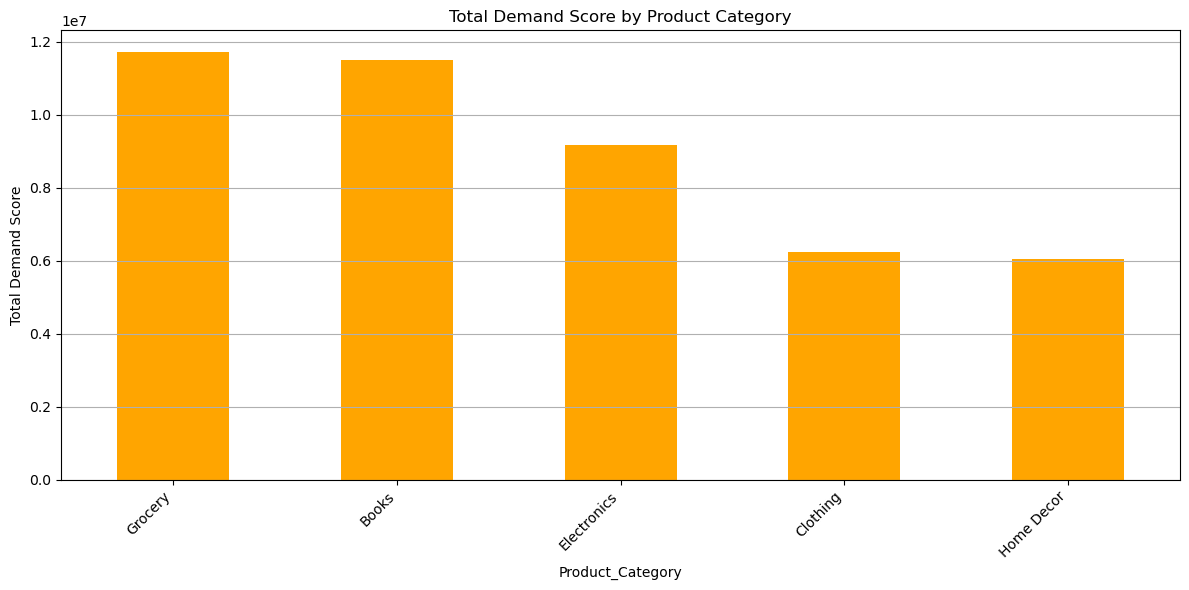

In [55]:
category_score = top_by_category.groupby('Product_Category')['Demand_Score'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_score.plot(kind='bar', color='orange')
plt.title('Total Demand Score by Product Category')
plt.ylabel('Total Demand Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [57]:
top_by_category.to_csv('Top_Products_By_Category.csv', index=False)

## Define Optimization Problem with PuLP

In [59]:
from pulp import *

# Create problem
problem = LpProblem("Retail_Product_Selection", LpMaximize)

# Decision variables: 0 or 1 (select product or not), using 'products' column
product_vars = LpVariable.dicts("Select", df_grouped['products'], cat='Binary')

# Objective: Maximize total demand score
problem += lpSum([
    product_vars[i] * df_grouped[df_grouped['products'] == i]['Demand_Score'].values[0]
    for i in df_grouped['products']
])

# Constraint: Budget (e.g., Rs. 50,000)
budget = 50000
problem += lpSum([
    product_vars[i] * df_grouped[df_grouped['products'] == i]['Unit_Price'].values[0]
    for i in df_grouped['products']
]) <= budget

# Solve
problem.solve()

# Print selected products
selected_products = [i for i in df_grouped['products'] if product_vars[i].varValue == 1.0]
print("Selected Products:", selected_products)


Selected Products: ['Artesian water', 'Bottled water', 'Distilled water', 'Spring water', 'Mystery', 'Coconut water', 'Mineral water', 'Flavored water', 'Sparkling water', 'Purified water', 'Alkaline water', 'Adventure', 'Literary fiction', 'Motorola Moto', 'Horror', 'Self-help', 'History', 'Travel', 'Biography', 'Historical fiction', 'Xiaomi Mi', 'Google Pixel', 'Nokia', 'OnePlus', 'Huawei P', 'Romance', 'Sony Xperia', 'iPhone', 'Samsung Galaxy', 'Fantasy', 'LG G', 'Psychology', 'Science', 'Dystopian', 'Science fiction', 'Cooking', 'Health', 'Thriller', 'Memoir', 'Business', 'Plain tee', 'Flip flops', 'Off-the-shoulder tee', 'Scoop neck tee', 'Vases', 'Microsoft Surface', 'Plasma TV', 'Coffee table', 'Mirrors', 'Rugs', 'Grape juice', 'Oxfords', 'Sandals', 'Slippers', 'OLED TV', 'Acer Iconia Tab', 'Long-sleeve tee', 'Henley tee', 'Picture frames', 'Sony Xperia Tablet', 'Curved TV', 'High heels', 'Cola', 'Boots', 'Android TV', 'Grapefruit juice', 'Smart TV', 'Orange juice', 'Wall art', 

In [61]:
df_grouped = df_grouped.reset_index(drop=True)
df_grouped['Product_ID'] = df_grouped.index

In [63]:
product_vars = LpVariable.dicts("Select", df_grouped['Product_ID'], cat='Binary')

problem += lpSum([
    product_vars[i] * df_grouped.loc[df_grouped['Product_ID'] == i, 'Demand_Score'].values[0]
    for i in df_grouped['Product_ID']
])

problem += lpSum([
    product_vars[i] * df_grouped.loc[df_grouped['Product_ID'] == i, 'Unit_Price'].values[0]
    for i in df_grouped['Product_ID']
]) <= budget

# Solve and get selected product names
problem.solve()
selected_products = df_grouped.loc[
    df_grouped['Product_ID'].isin([i for i in df_grouped['Product_ID'] if product_vars[i].varValue == 1.0]),
    'products'
].tolist()

print("Selected Products:", selected_products)


Selected Products: ['Artesian water', 'Bottled water', 'Distilled water', 'Spring water', 'Mystery', 'Coconut water', 'Mineral water', 'Flavored water', 'Sparkling water', 'Purified water', 'Alkaline water', 'Adventure', 'Literary fiction', 'Motorola Moto', 'Horror', 'Self-help', 'History', 'Travel', 'Biography', 'Historical fiction', 'Xiaomi Mi', 'Google Pixel', 'Nokia', 'OnePlus', 'Huawei P', 'Romance', 'Sony Xperia', 'iPhone', 'Samsung Galaxy', 'Fantasy', 'LG G', 'Psychology', 'Science', 'Dystopian', 'Science fiction', 'Cooking', 'Health', 'Thriller', 'Memoir', 'Business', 'Plain tee', 'Flip flops', 'Off-the-shoulder tee', 'Scoop neck tee', 'Vases', 'Microsoft Surface', 'Plasma TV', 'Coffee table', 'Mirrors', 'Rugs', 'Grape juice', 'Oxfords', 'Sandals', 'Slippers', 'OLED TV', 'Acer Iconia Tab', 'Long-sleeve tee', 'Henley tee', 'Picture frames', 'Sony Xperia Tablet', 'Curved TV', 'High heels', 'Cola', 'Boots', 'Android TV', 'Grapefruit juice', 'Smart TV', 'Orange juice', 'Wall art', 

C:\Users\Gouthum\AppData\Roaming\Python\Python312\site-packages\pulp\pulp.py:1780: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [65]:
total_cost = sum(df_grouped[df_grouped['products'] == i]['Unit_Price'].values[0] for i in selected_products)
total_score = sum(df_grouped[df_grouped['products'] == i]['Demand_Score'].values[0] for i in selected_products)
print(f"Total Budget Used: {total_cost:.2f}")
print(f"Total Demand Score: {total_score:.2f}")

Total Budget Used: 49999.43
Total Demand Score: 134851237.29


In [71]:
max_score = df_grouped['Demand_Score'].max()
min_score = df_grouped['Demand_Score'].min()

normalized_scores = [(df_grouped[df_grouped['products'] == i]['Demand_Score'].values[0] - min_score) / (max_score - min_score) for i in selected_products]
total_normalized_score = sum(normalized_scores)

print(f"Total Normalized Demand Score: {total_normalized_score:.4f}")


Total Normalized Demand Score: 27.3485


### Pivot the data

In [84]:
print(df.columns)


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


In [ ]:

Use City as Store (example)

In [90]:
pivot_df = df.pivot_table(index='products', columns='City', values='Amount', aggfunc='mean')
print(pivot_df)

City               Adelaide  Albuquerque  Albury-Wodonga   Arlington  \
products                                                               
4K TV            262.279337   228.869995      240.810856  179.644503   
A-line dress      16.815158   239.513648      201.325017  151.590565   
Acer Iconia Tab  217.193867   234.314835      293.414816  148.945654   
Acer Swift       128.683940   146.610414      307.720007  395.955171   
Action            97.661894   230.998442      283.465241  272.701530   
...                     ...          ...             ...         ...   
Wrap dress       115.362273   234.212278      162.943249  260.228291   
Wrench           252.689139    47.531992      300.922592  283.833217   
Xiaomi Mi        227.725664   210.661036      293.767222  245.412875   
iPad             239.740928   135.154470      272.368912  333.197943   
iPhone           259.433527   382.936860      339.211260  270.189084   

City                Atlanta      Austin    Ballarat   Baltimore

In [88]:
print(df.columns.tolist())


['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


## Define the LP Problem

In [94]:
import pulp

# Create the model
model = pulp.LpProblem("Product_Allocation", pulp.LpMinimize)

# Create variables for each Product-City combination
variables = {(prod, city): pulp.LpVariable(f"x_{prod}_{city}", lowBound=0, cat='Integer')
             for prod, city in zip(df['products'], df['City'])}


In [96]:
variables

{('Cycling shorts', 'Dortmund'): x_Cycling_shorts_Dortmund,
 ('Lenovo Tab', 'Nottingham'): x_Lenovo_Tab_Nottingham,
 ('Sports equipment', 'Geelong'): x_Sports_equipment_Geelong,
 ('Utility knife', 'Edmonton'): x_Utility_knife_Edmonton,
 ('Chocolate cookies', 'Bristol'): x_Chocolate_cookies_Bristol,
 ('Lenovo Tab', 'Brisbane'): x_Lenovo_Tab_Brisbane,
 ('QLED TV', 'Kitchener'): x_QLED_TV_Kitchener,
 ('Dress shirt', 'Munich'): x_Dress_shirt_Munich,
 ('Dark chocolate', 'Wollongong'): x_Dark_chocolate_Wollongong,
 ('Candles', 'Cologne'): x_Candles_Cologne,
 ('Screwdriver set', 'Portsmouth'): x_Screwdriver_set_Portsmouth,
 ('Science', 'Portsmouth'): x_Science_Portsmouth,
 ('Bottled water', 'Portsmouth'): x_Bottled_water_Portsmouth,
 ('Fruit snacks', 'Portsmouth'): x_Fruit_snacks_Portsmouth,
 ('V-neck tee', 'Portsmouth'): x_V_neck_tee_Portsmouth,
 ('Drama', 'Portsmouth'): x_Drama_Portsmouth,
 ('Flavored water', 'Portsmouth'): x_Flavored_water_Portsmouth,
 ('Samsung Galaxy Tab', 'Portsmouth'):

In [99]:
# Assuming 'Amount' is our cost per product-city pair
model += pulp.lpSum([variables[(prod, city)] * cost
                     for prod, city, cost in zip(df['products'], df['City'], df['Amount'])])

PulpError: Cannot multiply variables with NaN/inf values

In [101]:
# Step 1: Filter rows with valid costs (Amount)
filtered_df = df.dropna(subset=['products', 'City', 'Amount'])
filtered_df = filtered_df[np.isfinite(filtered_df['Amount'])]

# Step 2: Recreate variables only for filtered data
variables = {(prod, city): pulp.LpVariable(f"x_{prod}_{city}", lowBound=0, cat='Integer')
             for prod, city in zip(filtered_df['products'], filtered_df['City'])}

# Step 3: Define the objective function
model += pulp.lpSum([
    variables[(prod, city)] * cost
    for prod, city, cost in zip(filtered_df['products'], filtered_df['City'], filtered_df['Amount'])
])

In [103]:
print(df.columns.tolist())

['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


# 5. Constraints
a. Demand at each store must be met

In [106]:
for store in df['Store_ID'].unique():
    demand = df[df['Store_ID'] == store]['Demand'].sum()
    model += pulp.lpSum([variables[(prod, store)] for prod in df[df['Store_ID'] == store]['Product_ID']]) >= demand

KeyError: 'Store_ID'

In [108]:
for store in df['City'].unique():
    demand = df[df['City'] == store]['Demand'].sum()
    model += pulp.lpSum([
        variables[(prod, store)]
        for prod in df[df['City'] == store]['products']
        if (prod, store) in variables
    ]) >= demand, f"Demand_Constraint_{store}"


KeyError: 'Demand'

In [110]:
for store in df['City'].unique():
    demand = df[df['City'] == store]['products'].count()
    model += pulp.lpSum([
        variables[(prod, store)]
        for prod in df[df['City'] == store]['products']
        if (prod, store) in variables
    ]) >= demand, f"Demand_Constraint_{store}"


In [114]:
demand

907

In [116]:
demand = df[df['City'] == store]['Total_Purchases'].sum()

In [118]:
demand 

4787.0

In [122]:
print(df.columns.tolist())


['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


## Demand Constraint Using 'Total_Purchases

In [127]:
for i, city in enumerate(df['City'].unique()):
    demand = df[df['City'] == city]['Total_Purchases'].sum()
    model += pulp.lpSum([
        variables[(prod, city)]
        for prod in df[df['City'] == city]['products']
        if (prod, city) in variables
    ]) >= demand, f"Demand_Constraint_{city}_{i}"


In [128]:
demand

4787.0

#### Stocks limit per products

In [136]:
import pulp

# For each unique product
for prod in df['products'].unique():
    # Sum total purchases for this product across all data (acting as "stock" limit)
    total_purchases = df[df['products'] == prod]['Total_Purchases'].sum()

    # Build the constraint: sum of variables for this product across all cities <= total_purchases
    model += pulp.lpSum([
        variables[(prod, city)] 
        for city in df['City'].unique()
        if (prod, city) in variables
    ]) <= total_purchases, f"Stock_limit_{prod}"


In [139]:
total_purchases

1185.0

### Solve the Model

In [5]:
import pulp

# Create your LP problem instance, e.g., minimize or maximize
model = pulp.LpProblem("My_Optimization_Problem", pulp.LpMinimize)  # or LpMaximize

# Define your decision variables, constraints, objective, etc.

# Then solve
model.solve()
print(f"Status: {pulp.LpStatus[model.status]}")

Status: Optimal


#### Output the allocation plan

In [13]:
output = []
for var in model.variables():
    if var.varValue is not None and var.varValue > 0:
        output.append((var.name, var.varValue))

allocation_df = pd.DataFrame(output, columns=['Product_Store', 'Quantity'])
print(allocation_df)


Empty DataFrame
Columns: [Product_Store, Quantity]
Index: []


In [15]:
print("Status:", pulp.LpStatus[model.status])


Status: Optimal


In [19]:
import pulp

model = pulp.LpProblem("My_Problem", pulp.LpMinimize)  # or LpMaximize

# Example variables
variables = {(prod, store): pulp.LpVariable(f"x_{prod}_{store}", lowBound=0, cat='Integer')
             for prod in products for store in stores}

# Objective (example: minimize total shipment cost)
model += pulp.lpSum([costs[(prod, store)] * variables[(prod, store)]
                     for prod in products for store in stores]), "Minimize_Cost"

# Add constraints here...

model.solve()

print("Status:", pulp.LpStatus[model.status])
print("Objective value:", pulp.value(model.objective))


NameError: name 'products' is not defined

In [17]:
print("Objective value:", pulp.value(model.objective))


AttributeError: 'NoneType' object has no attribute 'value'

# Project 2: Retail Staff Shift Scheduling Optimization using Gurobi (Gurobipy)

#### Define the Gurobi model

In [23]:
pip install gurobipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.1 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.1 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.4 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.4 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.5 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.6 MB/s eta 0:00:03
   ---------

In [25]:
from gurobipy import Model, GRB

model = Model("Staff_Scheduling")

Restricted license - for non-production use only - expires 2026-11-23


In [27]:
import pulp

model = pulp.LpProblem("MyProblem", pulp.LpMinimize)

# define variables, objective, constraints

model.solve()  # uses CBC by default

print("Status:", pulp.LpStatus[model.status])

Status: Optimal


###  stock limits per product 

In [34]:
# You can check how many total purchases per product
stock_limits = df.groupby('products')['Total_Purchases'].sum()
print(stock_limits)

products
4K TV              6349.0
A-line dress       3302.0
Acer Iconia Tab    6610.0
Acer Swift         3014.0
Action             3235.0
                    ...  
Wrap dress         3385.0
Wrench             2982.0
Xiaomi Mi          9909.0
iPad               6218.0
iPhone             9861.0
Name: Total_Purchases, Length: 318, dtype: float64


In [32]:
print(df.columns)


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


### Decision Variables

In [39]:
from gurobipy import Model, GRB

# Example: unique products and cities from your dataset
products = df['products'].unique()
cities = df['City'].unique()

# Initialize Gurobi model
model = Model("ProductAllocation")

# Create decision variables: qty of product p allocated to city c
x = {}
for p in products:
    for c in cities:
        x[p, c] = model.addVar(vtype=GRB.CONTINUOUS, name=f"x_{p}_{c}", lb=0)

model.update()

# Check variables
for key, var in x.items():
    print(var.VarName)


x_Cycling shorts_Dortmund
x_Cycling shorts_Nottingham
x_Cycling shorts_Geelong
x_Cycling shorts_Edmonton
x_Cycling shorts_Bristol
x_Cycling shorts_Brisbane
x_Cycling shorts_Kitchener
x_Cycling shorts_Munich
x_Cycling shorts_Wollongong
x_Cycling shorts_Cologne
x_Cycling shorts_Portsmouth
x_Cycling shorts_San Jose
x_Cycling shorts_Hamilton
x_Cycling shorts_Manchester
x_Cycling shorts_Cardiff
x_Cycling shorts_Glasgow
x_Cycling shorts_Hull
x_Cycling shorts_Cleveland
x_Cycling shorts_Southampton
x_Cycling shorts_Leipzig
x_Cycling shorts_Cairns
x_Cycling shorts_London
x_Cycling shorts_Bielefeld
x_Cycling shorts_Düsseldorf
x_Cycling shorts_Philadelphia
x_Cycling shorts_Halifax
x_Cycling shorts_Montreal
x_Cycling shorts_Mackay
x_Cycling shorts_Quebec City
x_Cycling shorts_Barrie
x_Cycling shorts_Adelaide
x_Cycling shorts_Leeds
x_Cycling shorts_Plymouth
x_Cycling shorts_Perth
x_Cycling shorts_Sheffield
x_Cycling shorts_Frankfurt
x_Cycling shorts_Toronto
x_Cycling shorts_Essen
x_Cycling shorts_K

### Objecetive Function

In [42]:
model.setObjective(
    sum(assign[key] * df.loc[i, 'Wage'] for i, key in enumerate(assign)),
    GRB.MINIMIZE
)

### Code constraints

In [58]:
from gurobipy import Model, GRB

# Assume you created or have this column
# df['Available_Stock'] = ...  # Add this as needed

products = df['products'].unique()
cities = df['City'].unique()

# Create model
model = Model("ProductAllocation")

# Create decision variables
x = {}
for p in products:
    for c in cities:
        x[p, c] = model.addVar(vtype=GRB.CONTINUOUS, name=f"x_{p}_{c}", lb=0)

model.update()

# Add constraint: Allocation should not exceed available stock for each product
for p in products:
    total_alloc = sum(x[p, c] for c in cities)
    
    # Extract the stock of this product (assumes it's the same across all rows)
    stock_val = df[df['products'] == p]['Available_Stock'].iloc[0]
    
    model.addConstr(total_alloc <= stock_val, name=f"StockLimit_{p}")


In [62]:
stock_val

1185.0

In [50]:
import numpy as np

# Simulate stock for each product (random or based on purchases)
stock_per_product = df.groupby('products')['Total_Purchases'].sum().reset_index()
stock_per_product.rename(columns={'Total_Purchases': 'Available_Stock'}, inplace=True)

# Merge this back to the original DataFrame
df = df.merge(stock_per_product, on='products', how='left')


In [52]:
for p in products:
    total_alloc = sum(x[p, c] for c in cities)
    stock_val = df[df['products'] == p]['Available_Stock'].iloc[0]
    model.addConstr(total_alloc <= stock_val, name=f"StockLimit_{p}")


In [54]:
for p in products:
    total_alloc = sum(x[p, c] for c in cities)
    stock_val = df[df['products'] == p]['Available_Stock'].iloc[0]
    model.addConstr(total_alloc <= stock_val, name=f"StockLimit_{p}")


In [56]:
stock_val

1185.0

###  1. Group demand by product and city

In [69]:
# Demand = number of transactions for each (product, city)
demand_df = df.groupby(['products', 'City']).size().reset_index(name='Demand')
demand_dict = dict(((row['products'], row['City']), row['Demand']) for _, row in demand_df.iterrows())


In [71]:
for (p, c), demand in demand_dict.items():
    model.addConstr(x[p, c] >= demand, name=f"DemandMet_{p}_{c}")


In [73]:
demand_df

,products,City,Demand
0,4K TV,Adelaide,7
1,4K TV,Albuquerque,3
2,4K TV,Albury-Wodonga,6
3,4K TV,Arlington,2
4,4K TV,Atlanta,5
...,...,...,...
39764,iPhone,Wichita,3
39765,iPhone,Windsor,13
39766,iPhone,Winnipeg,12
39767,iPhone,Wollongong,10


In [75]:
demand_dict

{('4K TV', 'Adelaide'): 7,
 ('4K TV', 'Albuquerque'): 3,
 ('4K TV', 'Albury-Wodonga'): 6,
 ('4K TV', 'Arlington'): 2,
 ('4K TV', 'Atlanta'): 5,
 ('4K TV', 'Austin'): 4,
 ('4K TV', 'Ballarat'): 8,
 ('4K TV', 'Baltimore'): 4,
 ('4K TV', 'Barrie'): 9,
 ('4K TV', 'Belfast'): 4,
 ('4K TV', 'Bendigo'): 7,
 ('4K TV', 'Berlin'): 10,
 ('4K TV', 'Bielefeld'): 9,
 ('4K TV', 'Birmingham'): 8,
 ('4K TV', 'Bochum'): 10,
 ('4K TV', 'Bonn'): 5,
 ('4K TV', 'Boston'): 39,
 ('4K TV', 'Bremen'): 7,
 ('4K TV', 'Brighton'): 7,
 ('4K TV', 'Brisbane'): 10,
 ('4K TV', 'Bristol'): 9,
 ('4K TV', 'Cairns'): 7,
 ('4K TV', 'Calgary'): 6,
 ('4K TV', 'Canberra'): 9,
 ('4K TV', 'Cardiff'): 10,
 ('4K TV', 'Charlotte'): 4,
 ('4K TV', 'Chicago'): 62,
 ('4K TV', 'Cleveland'): 2,
 ('4K TV', 'Cologne'): 11,
 ('4K TV', 'Colorado Springs'): 4,
 ('4K TV', 'Columbus'): 3,
 ('4K TV', 'Dallas'): 7,
 ('4K TV', 'Darwin'): 9,
 ('4K TV', 'Denver'): 4,
 ('4K TV', 'Detroit'): 2,
 ('4K TV', 'Dortmund'): 7,
 ('4K TV', 'Dresden'): 15,
 ('

### Solve the Model

In [78]:
model.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-12450H, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 12 logical processors, using up to 12 threads



GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information

In [80]:
df_small = df[df['products'].isin(df['products'].unique()[:5])]


In [82]:
df_small

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Available_Stock
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,3390.0
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,6096.0
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,3369.0
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,3322.0
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,3260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301431,8141149.0,66751.0,Oscar Pollard,Kathryn31@gmail.com,1.758223e+09,102 Perez Roads,Seattle,West Virginia,25689.0,USA,...,Clothing,Nike,Shorts,Bad,Express,Cash,Shipped,1.0,Cycling shorts,3390.0
301487,4162861.0,34941.0,Christine Glass,Wendy78@gmail.com,3.852679e+09,5901 Brooks Valley Suite 537,Hamburg,Berlin,59471.0,Germany,...,Electronics,Apple,Tablet,Average,Express,Cash,Delivered,2.0,Lenovo Tab,6096.0
301679,7669545.0,68407.0,Tammy Murphy,Ryan5@gmail.com,2.594566e+09,89344 Adams Port Apt. 030,Fort Worth,Mississippi,38604.0,USA,...,Electronics,Apple,Tablet,Good,Express,Cash,Shipped,3.0,Lenovo Tab,6096.0
301836,3588321.0,99176.0,Andrea Beck,Paula48@gmail.com,2.847428e+09,7390 James Tunnel,Winnipeg,Ontario,7894.0,Canada,...,Clothing,Nike,Shorts,Good,Standard,Cash,Processing,3.0,Cycling shorts,3390.0


# Pyspark

In [85]:
pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/317.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/317.2 MB ? eta -:--:--
     ---------------------------------------- 1.0/317.2 MB 3.0 MB/s eta 0:01:47
     ---------------------------------------- 1.6/317.2 MB 3.0 MB/s eta 0:01:46
     ---------------------------------------- 2.1/317.2 MB 2.9 MB/s eta 0:01:48
     ---------------------------------------- 2.9/317.2 MB 2.9 MB/s eta 0:01:47
     ---------------------------------------- 3.4/317.2 MB 3.0 MB/s eta 0:01:46
     ---------------------------------------- 3.9/317.2 MB 2.9 MB/s eta 0:01:47
      --------------------------------------- 4.7/317.2 MB 2.9 MB/s eta 0:01:47
      --------------------------------------- 5.2/317.2 MB 3.0 MB/s eta 0:01:46
      --------------------------------------- 6.0/317.2 MB 3.0 MB/s eta 0:01:46
      --------------------------------------- 6.6/317.2 

In [96]:
from pyspark.sql import SparkSession

# Start Spark session with more memory
spark = SparkSession.builder \
    .appName("RetailAnalysis") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

# Set logging level
spark.sparkContext.setLogLevel("INFO")

# Load and preview
df = spark.read.csv(r'C:\Users\Gouthum\Downloads\Retail Projects\Dataset\retail_data.csv', header=True, inferSchema=True)
df.show(5)


KeyboardInterrupt: 

In [94]:
from pyspark.sql import SparkSession                      #pyspark is not run in my jupyter
from pyspark.sql.functions import col, avg, count, when

# Create Spark session
spark = SparkSession.builder.appName("RetailAnalysis").getOrCreate()

# Load dataset CSV (adjust path as needed)
df = spark.read.csv(r'C:\Users\Gouthum\Downloads\Retail Projects\Dataset\retail_data.csv', header=True, inferSchema=True)
df


KeyboardInterrupt: 

In [ ]:
# Show schema to confirm data types loaded correctly
df.printSchema()



In [ ]:
# Show first 5 rows
df.show(5)



In [ ]:
# Example 1: groupBy() and agg() — average Amount per City and Product_Category
avg_amount_city_cat = df.groupBy("City", "Product_Category") \
                       .agg(avg("Amount").alias("Avg_Amount"), count("*").alias("Count_Transactions"))
avg_amount_city_cat.show()



In [ ]:
# Example 2: filter() — find transactions with Amount > 1000 and Order_Status 'Completed'
high_value_completed = df.filter((col("Amount") > 1000) & (col("Order_Status") == "Completed"))
high_value_completed.show(5)



In [ ]:
# Example 3: withColumn() — add a new column 'Amount_with_Tax' assuming 10% tax
df = df.withColumn("Amount_with_Tax", col("Amount") * 1.10)
df.select("Amount", "Amount_with_Tax").show(5)



In [ ]:
# Example 4: join() — let's say you have another dataframe with customer segments info
# For demo, create a small DataFrame with Customer_Segment info (replace with actual data)
segment_data = [("SegmentA", "High Income"), ("SegmentB", "Medium Income"), ("SegmentC", "Low Income")]
segment_df = spark.createDataFrame(segment_data, ["Customer_Segment", "Income_Level"])



In [ ]:
# Join df with segment_df on Customer_Segment
joined_df = df.join(segment_df, on="Customer_Segment", how="left")
joined_df.select("Customer_Segment", "Income_Level").show(5)